# Assignment 4
## Akarsh Sahu
### 10-23-2019

## Loading Libraries

In [19]:
import pandas as pd
import numpy as np

## 1. Data Processing:

### a) Import the data: shape should be (30000,24)

In [23]:
data = pd.read_csv('credit.csv')
data.shape

(30000, 24)

In [14]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### b) Remove any rows that have missing data. 

In [15]:
data.isnull().any()

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

### c) The target / y variable is "default payment next month" column. Keep all predictors for the X df except for the target variable. 

In [24]:
y = data['default payment next month']
data.drop(['default payment next month'], axis = 1, inplace = True)
X = data

### d) Split data into train / test set using an 70/30 split. Recall that you should be generating an X_train, X_test, y_train, and y_test.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.3, random_state=42)

## 2. Random Forest Classifier - Base Model:

### a) Use the RandomForestClassifier in sklearn. Fit your model on the training data & make sure to add a random_state

In [27]:
from sklearn.ensemble import RandomForestClassifier

mdl1 = RandomForestClassifier(random_state = 42)

mdl1.fit(X_train, y_train)

C:\Users\akars\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [28]:
predY_1 = mdl1.predict(X_test)
predProb_1 = mdl1.predict_proba(X_test)

### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). These are the same tools from HW #3.

In [29]:
# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predY_1)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, predY_1)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[6632  408]
 [1345  615]]



Classification Report

               precision    recall  f1-score   support

           0       0.83      0.94      0.88      7040
           1       0.60      0.31      0.41      1960

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



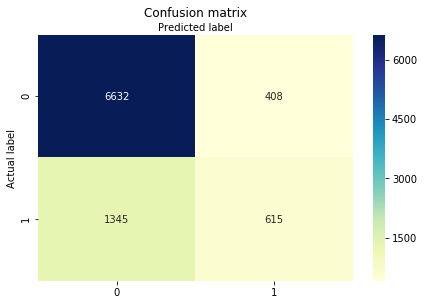

In [38]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g');
ax.xaxis.set_label_position("top");
plt.tight_layout();
plt.title('Confusion matrix', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

### d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.

In [40]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, predY_1)

0.627910482374768

### e) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

In [41]:
predY_tr_1 = mdl1.predict(X_train)
predProb_tr_1 = mdl1.predict_proba(X_train)

In [42]:
# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, predY_tr_1)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, predY_tr_1)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[16297    27]
 [  396  4280]]



Classification Report

               precision    recall  f1-score   support

           0       0.98      1.00      0.99     16324
           1       0.99      0.92      0.95      4676

   micro avg       0.98      0.98      0.98     21000
   macro avg       0.99      0.96      0.97     21000
weighted avg       0.98      0.98      0.98     21000



In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, predY_tr_1)

0.9568291131532575

As can be seen, the precision,recall, and f1 score are pretty hight in training dataset as compared to the test set. Also, the ROC curve is 95% in train set. Hence, there is a sign of overfitting

## 3. Random Forest Classifier - Grid Search:

#### a) Use the RandomForestClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following: 

1. n_estimators: 50, 100, 500
2. max_features: 2, 4, sqrt
3. max_depth: 6, 8, 10, 12

In [46]:
from sklearn.model_selection import GridSearchCV

#create a dictionary of parameters 
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [3,4,5,6,7,8],
    'n_estimators': [50, 100, 500],
    'max_features': [2,4,6]
}

# create Random Forest model 
rf_obj=RandomForestClassifier()

# Create gridsearch object with various combinations of parameters
rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [50]:
# Fit the grid search to the data
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 25.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [3, 4, 5, 6, 7, 8], 'n_estimators': [50, 100, 500], 'max_features': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

### b) Identify the best performing model:

In [52]:
rf_Grid.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_split': 8,
 'n_estimators': 500}

In [56]:
best_mdl = rf_Grid.best_estimator_

### c) Use the best estimator model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [58]:
predY_2 = best_mdl.predict(X_test)
predProb_2 = best_mdl.predict_proba(X_test)

### d) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 

In [60]:
# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, predY_2)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, predY_2)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[6689  351]
 [1268  692]]



Classification Report

               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.35      0.46      1960

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



### e) Calculate the roc_auc_score for this model.

In [61]:
roc_auc_score(y_test, predY_2)

0.6516016349721707

### f) Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

In [62]:
predY_tr_2 = best_mdl.predict(X_train)
predProb_tr_2 = best_mdl.predict_proba(X_train)

In [63]:
# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, predY_tr_2)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, predY_tr_2)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[15886   438]
 [ 2582  2094]]



Classification Report

               precision    recall  f1-score   support

           0       0.86      0.97      0.91     16324
           1       0.83      0.45      0.58      4676

   micro avg       0.86      0.86      0.86     21000
   macro avg       0.84      0.71      0.75     21000
weighted avg       0.85      0.86      0.84     21000



In [64]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, predY_tr_2)

0.7104934947551602

The metrics precision, recall, and f1 score for train dataset are comparable to that of test dataset. Also, the AUC of the train dataset is 71% as compared to 65% AUC of the test dataset. Hence, there is not overfitting as such.

## 4. Create a feature importance plot for your best performing model.

### a) What are the top 5 features for this model?

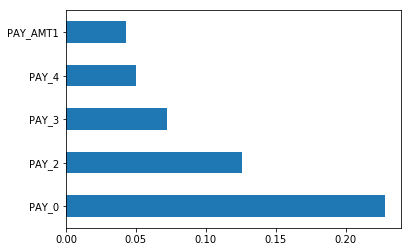

In [71]:
feat_importances = pd.Series(best_mdl.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh');

## 5. Conceptual Questions:

### a) What are the best parameters from the Grid Search in Question # 3? Does the Model from #3 outperform Model #2? Explain why.

Best parameters from the Grid Search:

bootstrap=True, class_weight=None, criterion='gini', max_depth=10, max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=8, min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False
            
The model from #3 slightly outperformed Model from #2. The roc_auc_score, classification report and confusion matrix for model #3 on the test data is better than that of model #2. This was possible because model #3 was tuned using grid search which performed the hyperparameter (characteristic of a model that is external to the model and whose value cannot be estimated from data and set prior to the commencement of a learning process) tunings to determine the optimal values (but not always, depending on what parameter choices are provided) for the Random Forest model.

### b) Overfitting is always a concern in ML problems. Does Model #3 overfit data more or less than Model #2? Explain why you think this is the case. 

Model #3 overfit the data LESS than Model #2. As mentioned above, the grid search performed an exhaustive search (for this assignmend the parameters provided was not exhaustive but still better than the default in Model #2) and found the optimal ways to tune the hyperparemeters based on the training set. Which provided us with a "better" model - because we "contolled" the values of the hyperparameters. Whereas, Model 2, which used the default settings, fitted the train data too well (the model got most of the patterns from the dataset), resulted in more severe overfitting.

### c) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?). 

The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?).
Random Forest technically is an ensemble method of decision trees generated on a randomly split dataset where the individual decision trees are generated using an attribute selection indicator such as information gain, gain ratio, and Gini index for each attribute. Gini Index is used to build a top performing model for Random forests by allowing it to find "important features" which shows the relative importance or contribution of each feature in the prediction. This helps to choose the most important features and drop the least important ones for model building. Random Forest uses the gini importance or mean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The Gini index can describe the overall explanatory power of the variables.

### d) Describe how Random Forest is different from bagging & why this difference can yield improved results.

A Random Forest is an ensemble of Decision Trees, generally trained via the bagging method. So bagging and random forests are “bagging” algorithms that aim to reduce the complexity of models that overfit the training data. But one of the fundamental difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.

Due to the random feature selection, the trees are more independent of each other compared to regular bagging. Meaning Random Forest algorithm introduces extra randomness when growing trees. Instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which trades a higher bias for a lower variance, generally yielding an overall better predictive performance.

### e) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.

max_depth represents the depth of each tree in the forest. The deeper the tree, the more splits it has and it captures more information about the data. This can be used to reduce the complexity of the learned models, lowering over fitting risk. Limiting the max_depth has the consequence that the Random Forest can no more fit the training data as closely, and is consequently more stable. It has lower variance, giving our model lower error. However, severely constraining max_depth could increase the bias of each tree given that they may not be able to capture certain patterns in the data before hitting their limit. So finding the balance and choosing a suitable max_depth comes with the tradeoff between bias and variance.

### f) In this homework we used k-fold cross-validation while determining the optimal hyperparameters for our Random Forest model. 
1) Describe how k-fold cross-validation works. 
2) What benefit do we gain by using k-fold cross-validation when tuning our Random Forest model versus only using the train-test split approach?

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data.

How it works (in general):

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
4. Take the group as a hold out or test data set
5. Take the remaining groups as a training data set
6. Fit a model on the training set and evaluate it on the test set
7. Retain the evaluation score and discard the model
8. Summarize the skill of the model using the sample of model evaluation scores


The primary object and benefit of using k-fold cross-validation while determining the optimal hyperparameters for our Random Forest model is to choose different partitions of the data, and then average the result, so that the result will not be biased by any single partition. i.e. for hyperparameter tuning for this tuning our random forest model, we perform many iterations of the entire K-Fold CV process, each time using different model settings. We then compared all of the models, selected the best one, train it on the full training set, and then evaluate on the testing set. This processed gave us an overall better predictive performance for our model.